# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import warnings

import imageio  # type: ignore
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append("../modules")
import plot_clustering as plt_cp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import smoothing_particles as sp  # type: ignore
import track_particles as tp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_2m_1f_240219_2"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [90, 1840]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv(
    "{}/clustered_{}.csv".format(output_path, video_name), low_memory=False
)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,439.948134,128.034305,433.710649,131.950569,0.0,494.0,70.0,0.654902,474.0,104.0,-1.233802,15887.0,240.769132,86.961652,0.932495,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,105.988439,206.822285,107.856729,203.456984,0.0,98.0,85.0,0.596078,87.0,130.0,-0.283455,8131.0,212.253102,109.340234,0.857106,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,597.233382,912.847658,590.949656,911.227200,0.0,501.0,847.0,0.643137,615.0,924.0,1.256412,13043.0,251.850364,86.728338,0.938836,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
54168,0,54171,416.889005,98.641361,426.117564,99.930783,0.0,430.000000,58.000000,0.623529,406.000000,72.000000,1.527727,13370.0,241.440760,82.503615,0.939804,3,3.0,0.015725,-0.005765,0.000096,False,False,False
54169,1,54171,61.481651,530.293578,56.393872,512.272597,NaN,61.481651,530.293578,NaN,61.481651,530.293578,0.342209,436.0,380.718621,84.162048,0.975260,3,3.0,-0.047591,0.004157,0.000041,False,False,False
54170,2,54171,129.917864,583.979271,138.965169,590.349169,NaN,129.917864,583.979271,NaN,129.917864,583.979271,0.868871,10227.0,247.085093,88.197872,0.934122,3,3.0,0.007315,-0.001139,-0.000036,False,False,False


## Swapping mixed IDs

In [6]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 10000, velocity_threshold, omega_threshold, True],
    [10000, 20000, velocity_threshold, omega_threshold, True],
    [20000, 30000, velocity_threshold, omega_threshold, True],
    [30100, 40000, velocity_threshold, omega_threshold, True],
    [40000, 50000, velocity_threshold, omega_threshold, True],
    [50000, 54172, velocity_threshold, omega_threshold, True]#,
    # [60000, 70000, velocity_threshold, omega_threshold, True],
    # [70000, 80000, velocity_threshold, omega_threshold, True],
    # [80000, 90000, velocity_threshold, omega_threshold, True],
    # [90000, 100000, velocity_threshold, omega_threshold, True],
    # [100000, 108000, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|█████████████████████████| 6/6 [00:31<00:00,  5.21s/it]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_10000,0,0,439.948134,128.034305,433.710649,131.950569,0.0,494.0,70.0,0.654902,474.0,104.0,-1.233802,-1.233802,15887.0,240.769132,86.961652,0.932495,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_10000,1,1,105.988439,206.822285,107.856729,203.456984,0.0,98.0,85.0,0.596078,87.0,130.0,-0.283455,-0.283455,8131.0,212.253102,109.340234,0.857106,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_10000,2,2,597.233382,912.847658,590.949656,911.227200,0.0,501.0,847.0,0.643137,615.0,924.0,1.256412,1.256412,13043.0,251.850364,86.728338,0.938836,3,NaN,NaN,NaN,NaN,False,False,False
4,True,3,chunk_00000_10000,1,0,439.821429,128.054263,433.565529,131.984822,0.0,494.0,70.0,0.650980,473.0,104.0,-1.234021,-1.234021,15904.0,241.047799,86.979460,0.932628,3,3.0,-0.042235,0.006653,-0.000073,True,False,False
3,True,3,chunk_00000_10000,0,1,120.821414,163.991229,124.877102,155.350786,0.0,156.0,37.0,0.611765,87.0,287.0,-0.322511,-0.322511,12655.0,306.711255,101.141314,0.944065,3,3.0,4.944325,-14.277019,-0.013019,False,True,False
5,True,3,chunk_00000_10000,2,2,597.488827,912.966790,591.242556,911.355734,0.0,501.0,847.0,0.643137,678.0,924.0,1.256619,1.256619,12978.0,251.723945,86.695617,0.938820,3,3.0,0.085148,0.039711,0.000069,False,False,False
7,True,6,chunk_00000_10000,1,0,439.853872,128.052966,433.600308,131.986086,0.0,494.0,70.0,0.650980,475.0,104.0,-1.233898,-1.233898,15897.0,241.035210,86.953258,0.932663,3,3.0,0.010814,-0.000432,0.000041,False,False,False
6,True,6,chunk_00000_10000,0,1,120.884393,164.295114,125.049450,155.724804,0.0,156.0,37.0,0.611765,74.0,288.0,-0.323131,-0.323131,12629.0,307.032157,100.815326,0.944555,3,3.0,0.020993,0.101295,-0.000206,False,False,False


In [7]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
54166,True,54168,chunk_50000_54172,1,1,61.624424,530.281106,56.500572,512.185254,NaN,61.624424,530.281106,NaN,61.624424,530.281106,0.342085,-0.342085,434.0,381.585210,83.957027,0.975495,3,3.0,0.075269,0.072197,0.000460,False,False,False
54165,True,54168,chunk_50000_54172,0,2,416.841829,98.658657,426.062714,99.953528,0.0,430.000000,58.000000,0.623529,409.000000,72.000000,1.527440,-1.527440,13359.0,241.522762,82.491098,0.939865,3,3.0,-0.014961,-0.004556,-0.000017,False,False,False
54170,True,54171,chunk_50000_54172,2,0,129.917864,583.979271,138.965169,590.349169,NaN,129.917864,583.979271,NaN,129.917864,583.979271,0.868871,-0.868871,10227.0,247.085093,88.197872,0.934122,3,3.0,0.007315,-0.001139,-0.000036,False,False,False
54169,True,54171,chunk_50000_54172,1,1,61.481651,530.293578,56.393872,512.272597,NaN,61.481651,530.293578,NaN,61.481651,530.293578,0.342209,-0.342209,436.0,380.718621,84.162048,0.975260,3,3.0,-0.047591,0.004157,0.000041,False,False,False
54168,True,54171,chunk_50000_54172,0,2,416.889005,98.641361,426.117564,99.930783,0.0,430.000000,58.000000,0.623529,406.000000,72.000000,1.527727,-1.527727,13370.0,241.440760,82.503615,0.939804,3,3.0,0.015725,-0.005765,0.000096,False,False,False


## Interpolation over not allowed frames

In [8]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:, "permuted_id"] == df_full["permuted_id"].unique()[id_]
        df_full[mask] = df_full[mask].interpolate(method="linear")

In [9]:
if ordering:
    cols = [
        "id",
        "permuted_id",
        "time",
        "position_x",
        "position_y",
        "weighted_x",
        "weighted_y",
        "darkest_v",
        "darkest_x",
        "darkest_y",
        "lightest_v",
        "lightest_x",
        "lightest_y",
        "orientation",
        "corrected_orientation",
        "area",
        "axis_major",
        "axis_minor",
        "eccentricity",
    ]
    df_temp = df_full[cols]
    df_temp.to_csv(
        "{}/interpolated_{}.csv".format(output_path, video_name), index=False
    )
    df_temp

Thresholds:
	- Velocity: 23.008114179790592 
	- Angle: 10.056957037761654 



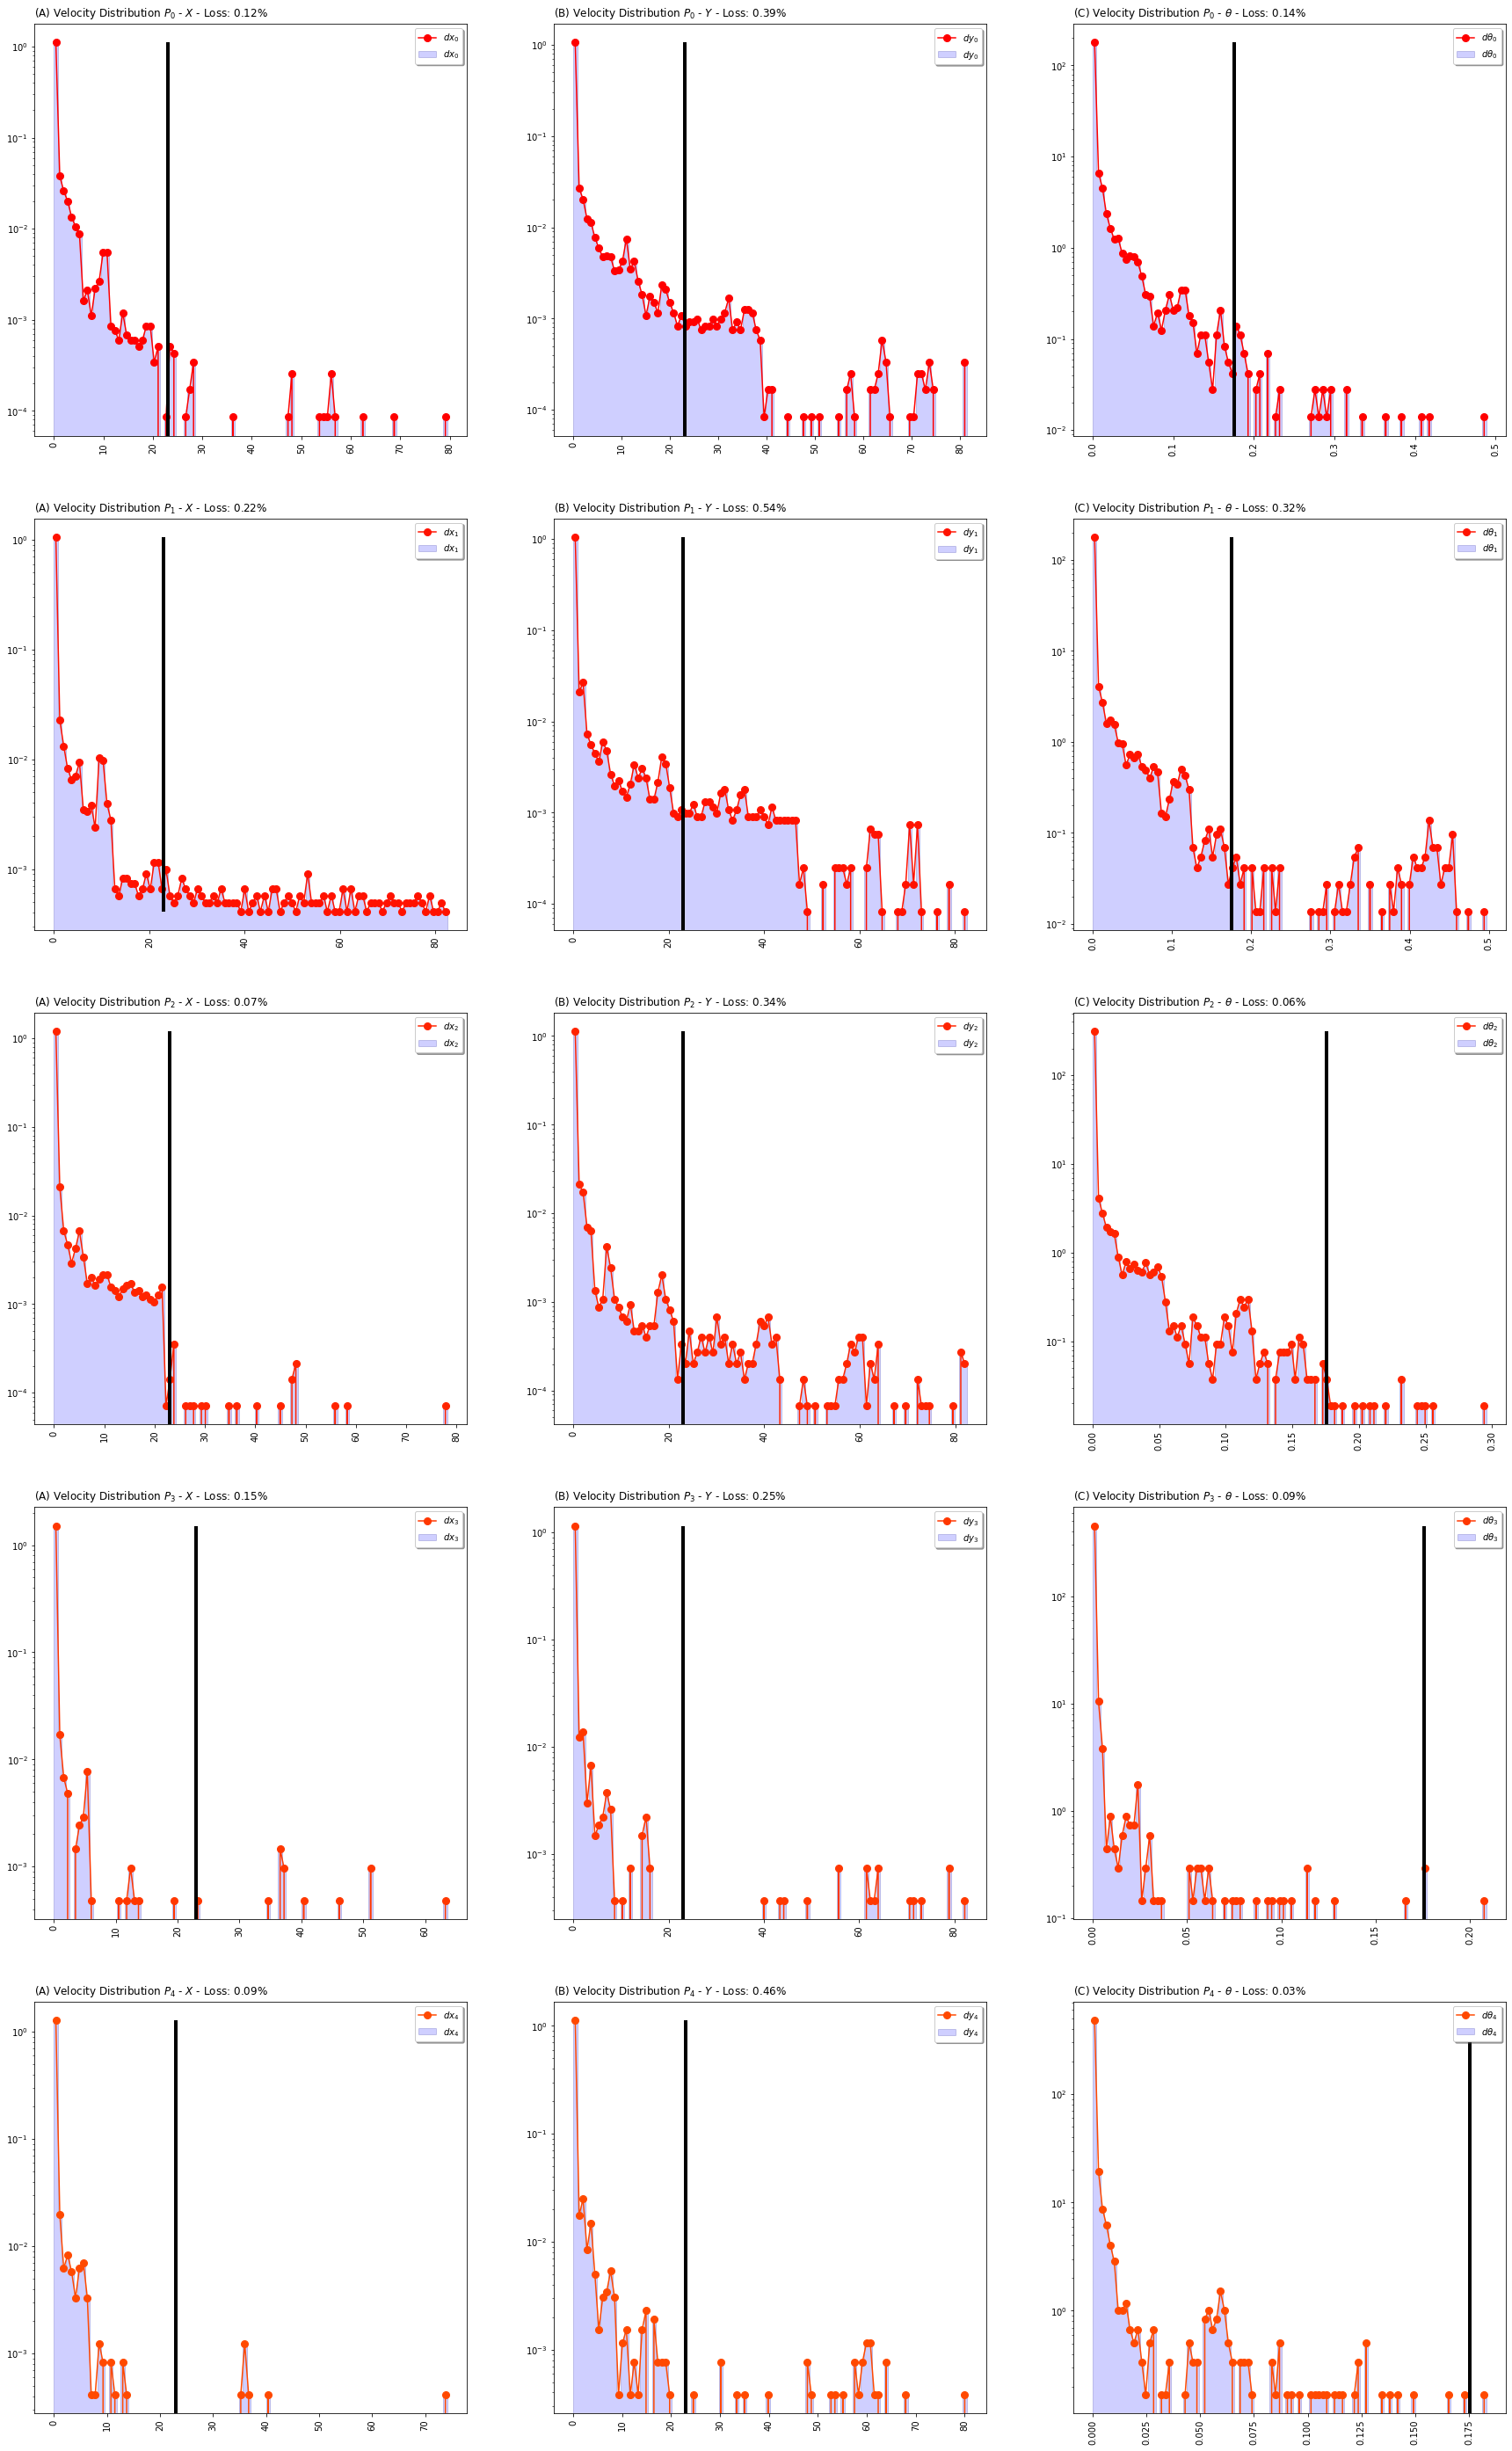

In [10]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = (
        df_full["velocity_orientation"].abs().quantile(0.9965)
    )  # Angular velocity per frame
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9901)
    )  # Velocity per frame limited with half average size of particle
    print(
        "Thresholds:\n\t- Velocity:",
        velocity_threshold,
        "\n\t- Angle:",
        omega_threshold * 180 / np.pi,
        "\n",
    )

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend,
    )

Original


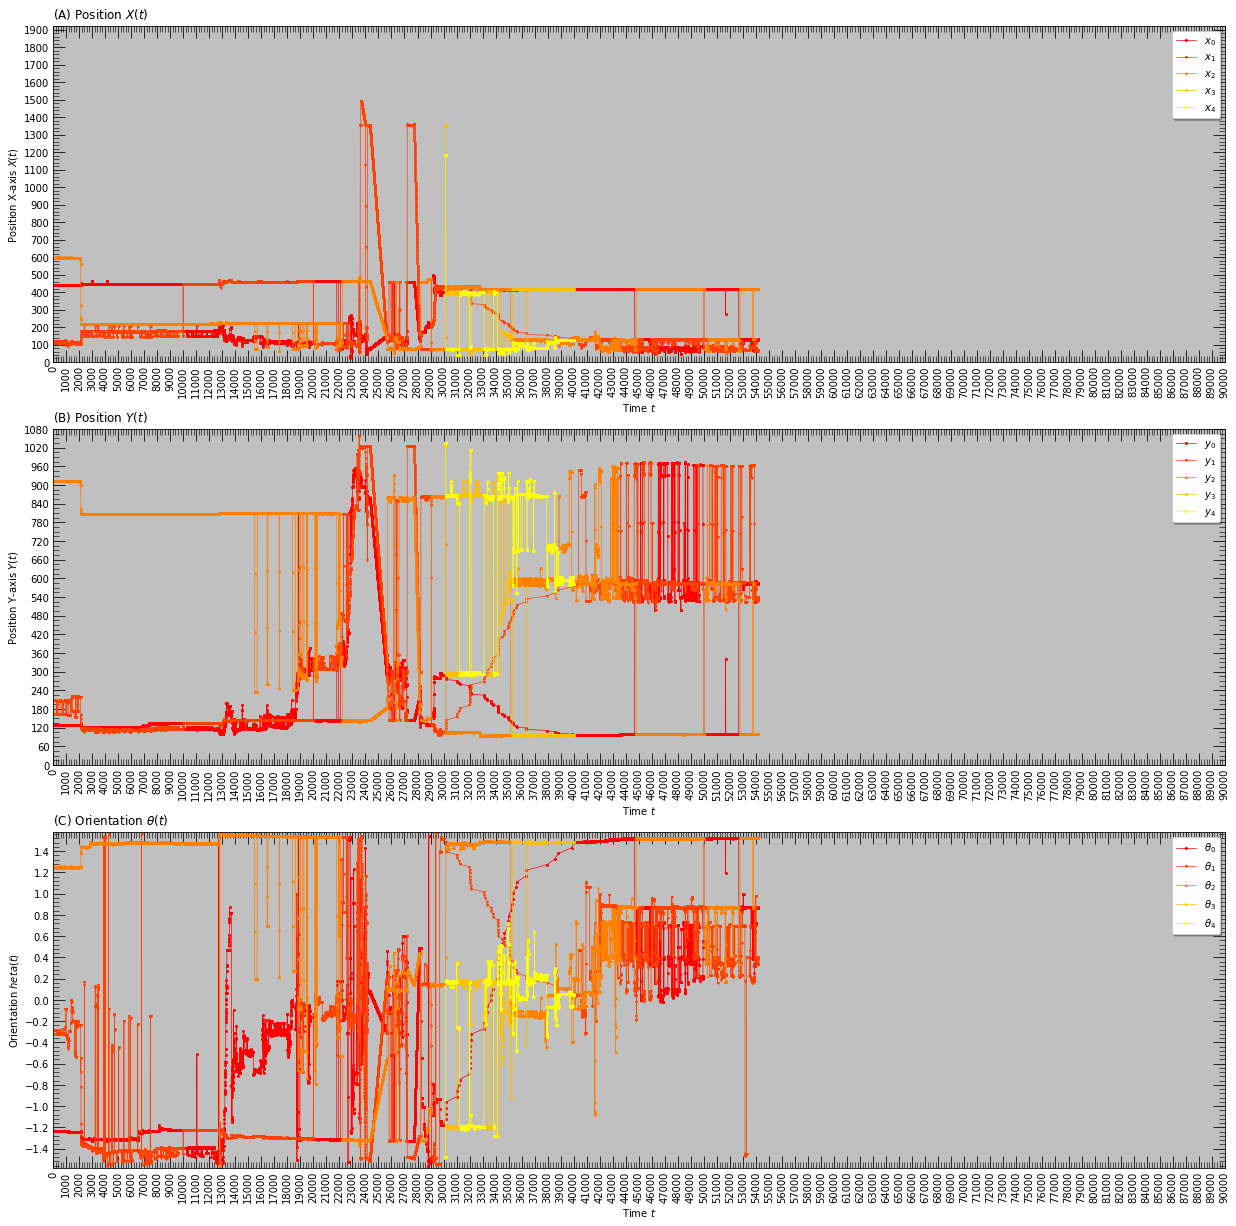

Corrected Orientation


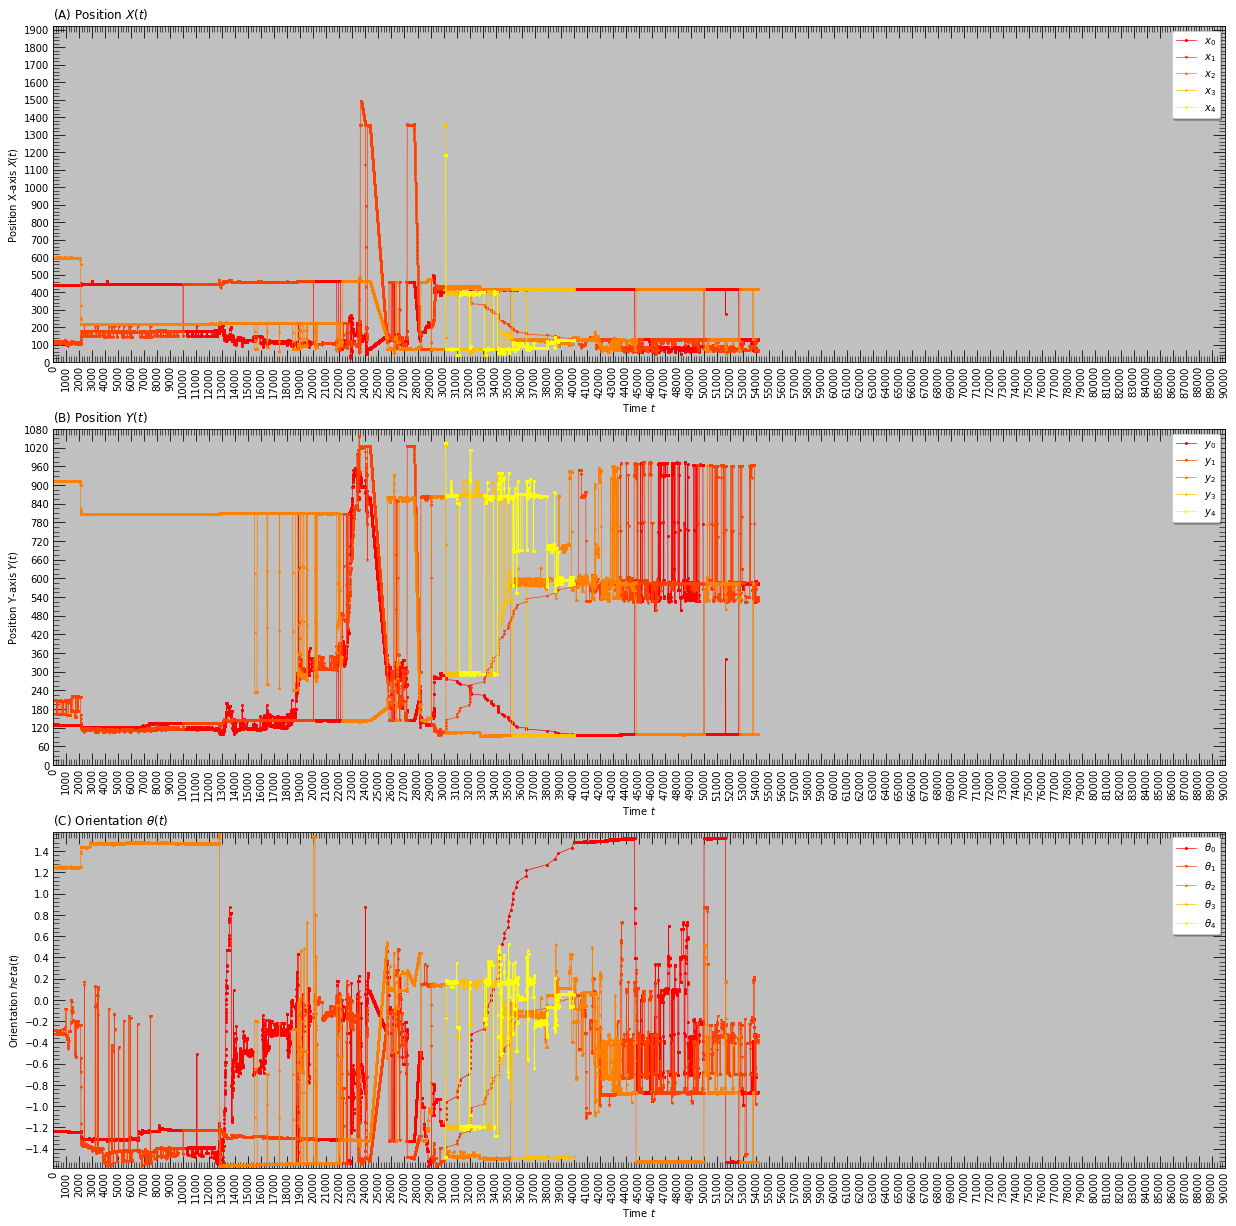

In [11]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = (
        df_full["velocity_x"].abs().quantile(0.9701)
    )  # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[
            (
                (df_smooth["velocity_x"] <= velocity_threshold)
                & (df_smooth["velocity_y"] <= velocity_threshold)
            )
        ],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend,
    )

## Setting video information

In [12]:
# # Load the video
# reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# # Check the number of frames
# num_frames = reader.count_frames()
# print("Total frames: {}".format(num_frames))

# # Extract a frame to inspect the content
# time = 0
# frame = reader.get_data(time)
# print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

## Comparative of process

In [13]:
# # Original frame
# time = 209  #271  # 209  # 80
# times = [time - 1, time, time + 1]
# reinforce_boundaries = True
# remove_holes = False
# type = "local equalized"
# clip_limit = 0.05
# threshold = 0.19
# sigma = 1.5
# x_bounds = x_bounds  # [40, 1020]
# y_bounds = y_bounds  # [160, 1740]
# region_area_min = 200
# axis_major_min = 94
# eccentricity_max = 0.99


# df_tracked_frame_0 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[0], reader.get_data(times[0])]
# )

# df_tracked_frame_1 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[1], reader.get_data(times[1])]
# )

# df_tracked_frame_2 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[2], reader.get_data(times[2])]
# )

# df_tracked_old = pd.concat([df_tracked_frame_0, df_tracked_frame_1, df_tracked_frame_2], ignore_index=True)

# width = 10
# n_x_breaks = 20
# n_y_breaks = 20
# fancy_legend = True
# x_legend = 1.001
# y_legend = 0.891

# df_smooth = df_full.copy()
# df_smooth["id"] = df_smooth["permuted_id"]
# df_smooth["orientation"] = df_smooth["corrected_orientation"]

# fig = plt_sp.plot_all_process_frame(
#     reader=reader,
#     times=times,
#     df_tracked=df_tracked_old,
#     df_clustered=df_tracked,
#     df_smoothed=df_smooth,
#     width=width,
#     n_x_breaks=n_x_breaks,
#     n_y_breaks=n_y_breaks,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     fancy_legend=fancy_legend,
#     x_legend=x_legend,
#     y_legend=y_legend
# )